In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Importar y limpiar df

In [106]:
# Import data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [107]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [108]:
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [109]:
# Concat
df = pd.concat([train, test], axis=0)

In [110]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
265,1157,NaN,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
213,1105,NaN,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S
441,442,0.0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S


In [111]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
df.shape

(1309, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [114]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Comentarios datos NaN:
- Eliminaremos columna Cabin por tener muchos NaN.
- Filas de Survived con NaN se eliminarán.
- Reemplazaremos por la moda en Embarked.
- Reemplazaremos por el promedio en columnas Fared y Age.

In [115]:
# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)

In [116]:
# Reemplazar valores NaN en Age, Embarked y Fared
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [117]:
df = df.dropna(subset=['Survived', 'Age'])

Comentarios:
- Otras columnas a eliminar porque encuentro que no tienen sentido: PassengerId, Name y Ticket.

In [118]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [119]:
# Revisar nuevamente nulos
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    float64
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 50.2+ KB


In [121]:
df.shape

(714, 8)

In [122]:
df['Survived'] = df['Survived'].astype('int')

## 2. EDA

Se analizará lo siguiente:
- Porcentaje de pasajeros que sobrevivieron.
- Distribución de Sex de los pasajeros.
- Distribución de Pclass de los pasajeros.
- Distribución de Age y Fare de los pasajeros.
- Distribución de sobrevivientes según Pclass.
- Distribución de sobrevivientes según Embarked.
- Distribución de sobrevivientes según Age.
- Distribución de sobrevivientes según Sex.

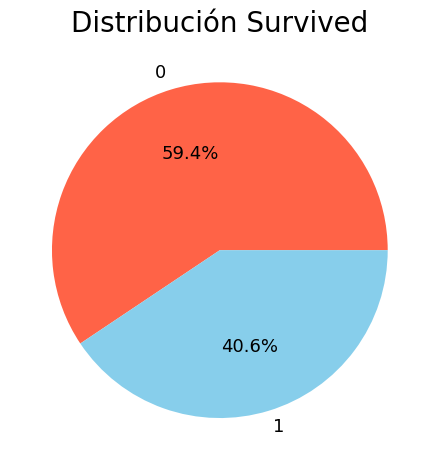

In [123]:
### Distribución Survived 1
survived_dist = df['Survived'].value_counts(normalize=True)

survived_dist.plot(kind='pie', autopct='%.1f%%', fontsize=13, colors=['tomato', 'skyblue'])
plt.title('Distribución Survived', size=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

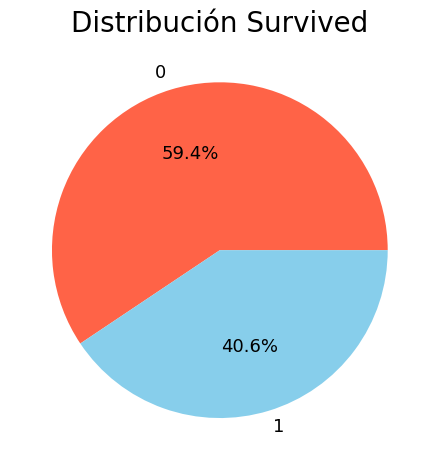

In [124]:
### Distribución Survived (otra forma)
df.groupby('Survived').size().plot(kind='pie', autopct='%.1f%%', fontsize=13, colors=['tomato', 'skyblue'])
plt.title('Distribución Survived', size=20)
plt.tight_layout()
plt.show()

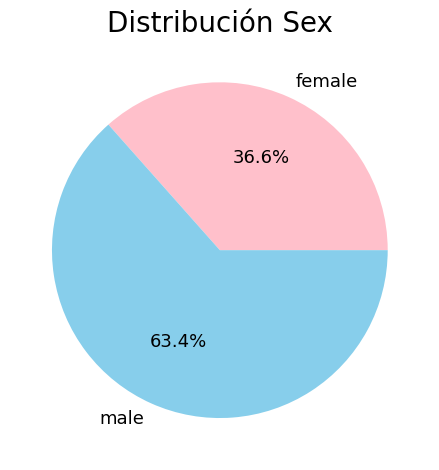

In [125]:
### Distribución Sex de todo el df
df.groupby('Sex').size().plot(kind='pie', autopct='%.1f%%', fontsize=13, colors=['pink', 'skyblue'])
plt.title('Distribución Sex', size=20)
plt.tight_layout()
plt.show()

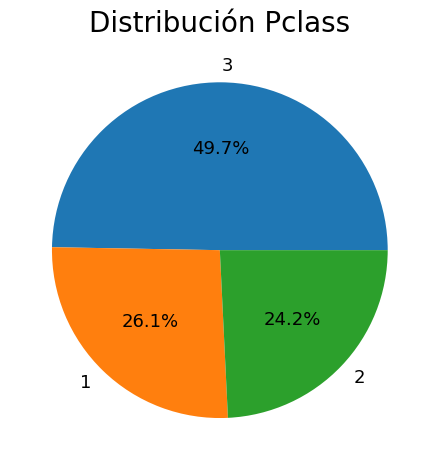

In [126]:
### Distribución Pclass de todo el df
pclass_dist = df['Pclass'].value_counts(normalize=True)

pclass_dist.plot(kind='pie', autopct='%.1f%%', fontsize=13)
plt.title('Distribución Pclass', size=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 



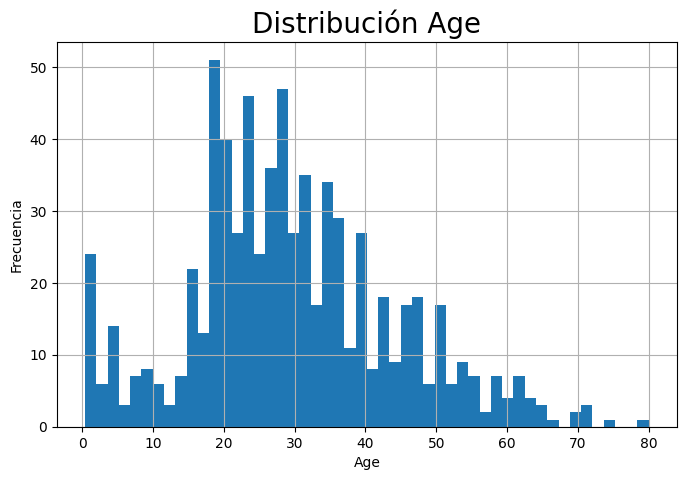

In [127]:
### Distribución Age de todo el df
print(df['Age'].describe(), '\n')

plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=50)
plt.title('Distribución Age', size=20)
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64 



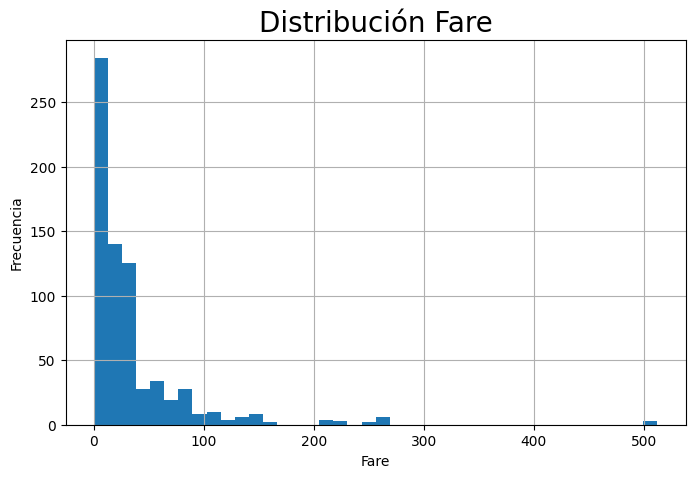

In [128]:
### Distribución Fare de todo el df
print(df['Fare'].describe(), '\n')

plt.figure(figsize=(8, 5))
plt.hist(df['Fare'], bins=40)
plt.title('Distribución Fare', size=20)
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Survived         0         1
Pclass                      
1         0.344086  0.655914
2         0.520231  0.479769
3         0.760563  0.239437 



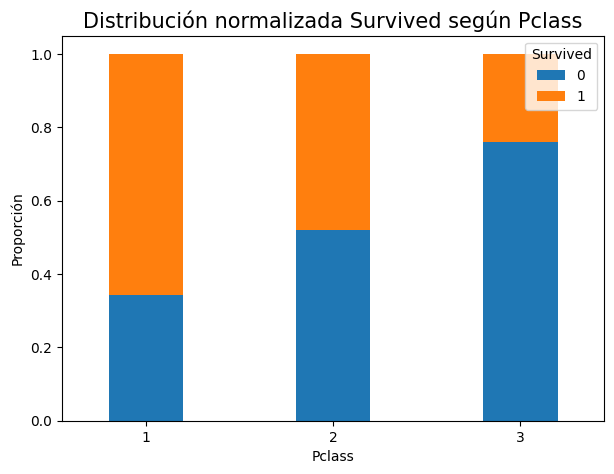

In [129]:
### Distribución normalizada Survived según Pclass
pclass_survived_norm = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

print(pclass_survived_norm, '\n')

pclass_survived_norm.plot(kind='bar', stacked=True, figsize=(7, 5), width=0.4)
plt.title('Distribución normalizada Survived según Pclass', size=15)
plt.xlabel('Pclass')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

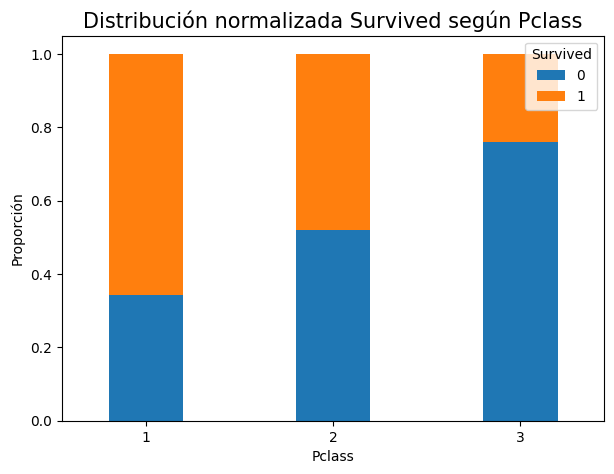

In [130]:
### Distribución normalizada Survived según Pclass (otra forma)
pclass_survived_norm_2 = df.groupby(['Pclass', 'Survived']).size().unstack().div(df.groupby('Pclass').size(), axis=0)

pclass_survived_norm_2.plot(kind='bar', stacked=True, figsize=(7, 5), width=0.4)
plt.title('Distribución normalizada Survived según Pclass', size=15)
plt.xlabel('Pclass')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

Survived    0    1
Pclass            
1          64  122
2          90   83
3         270   85 



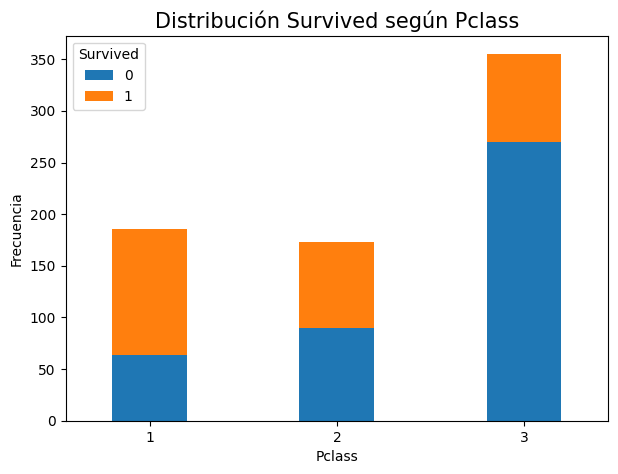

In [131]:
### Distribución Survived según Pclass (no normalizada)
pclass_survived = df.groupby('Pclass')['Survived'].value_counts().unstack()

print(pclass_survived, '\n')

pclass_survived.plot(kind='bar', stacked=True, figsize=(7, 5), width=0.4)
plt.title('Distribución Survived según Pclass', size=15)
plt.xlabel('Pclass')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

Survived         0         1
Embarked                    
C         0.392308  0.607692
Q         0.714286  0.285714
S         0.634892  0.365108 



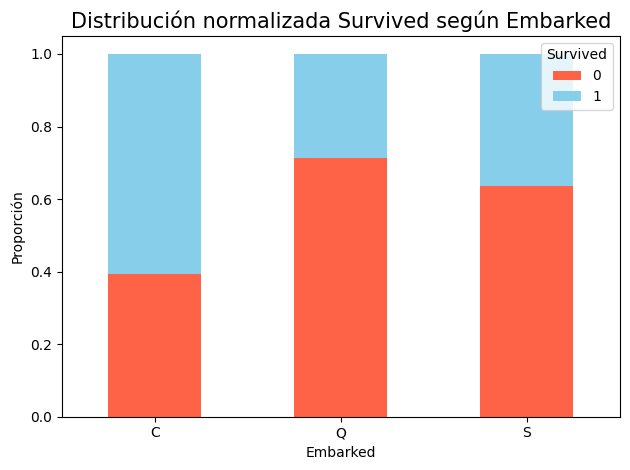

In [132]:
### Distribución normalizada Survived según Embarked
embarked_survived_norm = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()
print(embarked_survived_norm, '\n')

embarked_survived_norm.plot(kind='bar', stacked=True, color=['tomato', 'skyblue'])
plt.title('Distribución normalizada Survived según Embarked', size=15)
plt.xlabel('Embarked')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
#plt.legend(title='Survived')
#plt.legend(['No sobrevivió', 'Sobrevivió'], loc='upper right')
plt.tight_layout()
plt.show()

Comentarios:
- Para analizar Survived según Age, se acrearán rangos de edad. Aunque considero que está demás.

In [133]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [134]:
### Distribución normalizada Survived según Age
df_age = df[['Age', 'Survived']]

bins = [0, 21, 40, 60, float('inf')]
labels = ['0-21', '21-40', '41-60', '61-80']

df_age['age_group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)

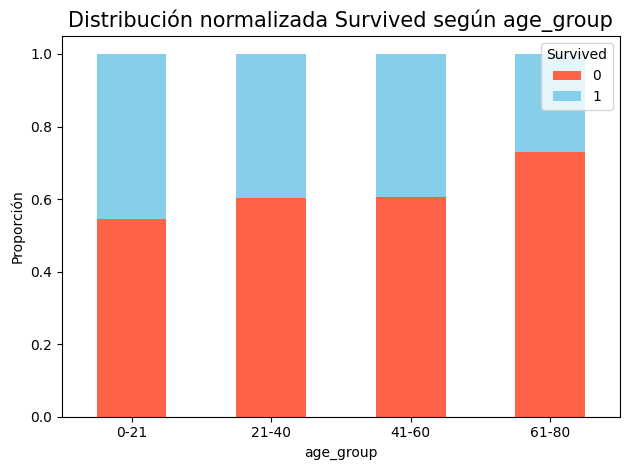

In [135]:
df_age.groupby('age_group')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                                                    stacked=True,
                                                                                    color=['tomato', 'skyblue'])
plt.title('Distribución normalizada Survived según age_group', size=15)
plt.xlabel('age_group')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

In [136]:
df_age.value_counts('age_group')

age_group
21-40    371
0-21     180
41-60    137
61-80     26
Name: count, dtype: int64

In [137]:
df_age['age_group'].value_counts()

age_group
21-40    371
0-21     180
41-60    137
61-80     26
Name: count, dtype: int64

Survived         0         1
Sex                         
female    0.245211  0.754789
male      0.794702  0.205298 



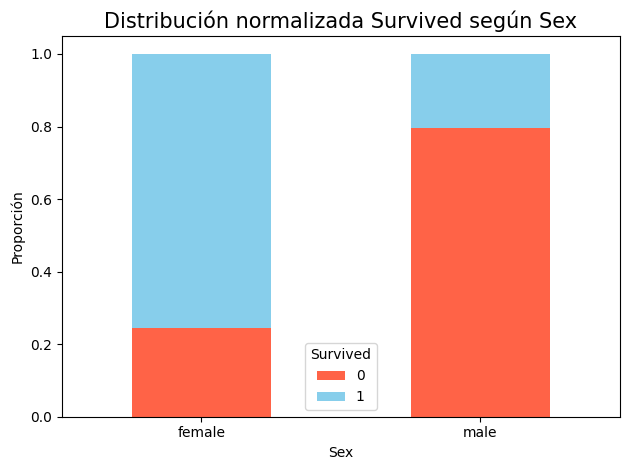

In [138]:
### Distribución normalizada Survived según Sex
sex_survived_norm = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print(sex_survived_norm, '\n')

sex_survived_norm.plot(kind='bar', stacked=True, color=['tomato', 'skyblue'])
plt.title('Distribución normalizada Survived según Sex', size=15)
plt.xlabel('Sex')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

Survived    0    1
Sex               
female     64  197
male      360   93 



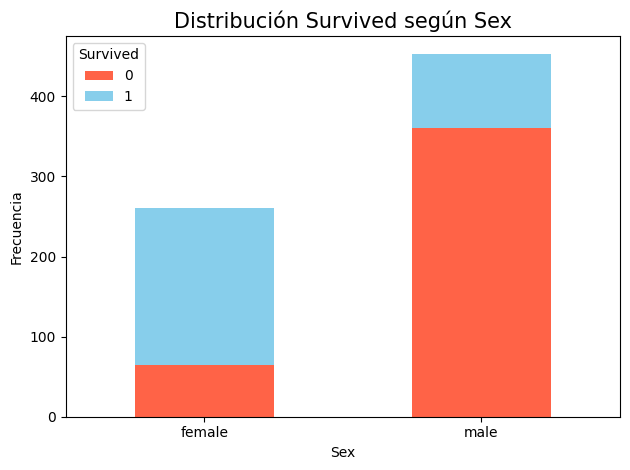

In [139]:
### Distribución Survived según Sex (no normalizada)
sex_survived = df.groupby('Sex')['Survived'].value_counts().unstack()
print(sex_survived, '\n')

sex_survived.plot(kind='bar', stacked=True, color=['tomato', 'skyblue'])
plt.title('Distribución Survived según Sex', size=15)
plt.xlabel('Sex')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

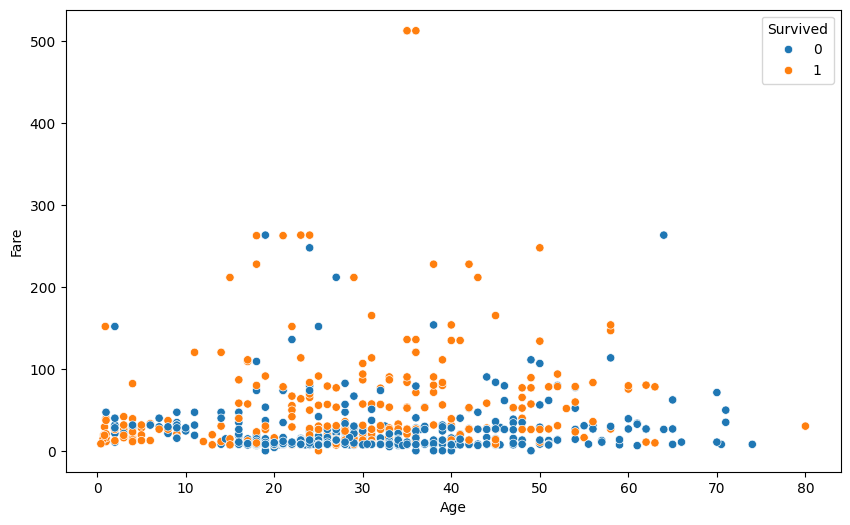

In [140]:
### Solo a modo de prueba
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

## 3. Recodificar + split data

Se aplicará:
- get_dummies a Sex y Embarked.
- Estandarizar Age y Fare.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


In [142]:
dfModel = df.copy()

In [143]:
# get_dummies() a Sex y Embarked
dfModel = pd.get_dummies(dfModel, columns=['Sex', 'Embarked'], dtype=int)

In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [145]:
X = dfModel.drop('Survived', axis=1)
Xsc = MinMaxScaler().fit_transform(X) # Escalar X
y = dfModel['Survived']

X_train, X_test, y_train, y_test = train_test_split(Xsc,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=88888)

In [146]:
print(Xsc)

[[1.         0.27117366 0.2        ... 0.         0.         1.        ]
 [0.         0.4722292  0.2        ... 1.         0.         0.        ]
 [1.         0.32143755 0.         ... 0.         0.         1.        ]
 ...
 [0.         0.23347575 0.         ... 0.         0.         1.        ]
 [0.         0.32143755 0.         ... 1.         0.         0.        ]
 [1.         0.39683338 0.         ... 0.         1.         0.        ]]


## 4. Aplicar modelos de clasificación

Se aplicará:
- Random Forest
- KNN
- SVM
- Gradient Boosting
- XGBoost

In [147]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

### 4.1 Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
# Validación cruzada
param_dist_rfCl = {'n_estimators':randint(100, 1000),
                   'max_depth':randint(1, 10)}

rand_search_rfCl = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=param_dist_rfCl,
                                      n_iter=5,
                                      cv=5, # Número de validaciones cruzadas
                                      random_state=88888)

rand_search_rfCl.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b969923af0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b969920460>},
                   random_state=88888)

In [150]:
print('Best hiperparameters:', rand_search_rfCl.best_params_)

Best hiperparameters: {'max_depth': 7, 'n_estimators': 633}


In [151]:
# Crear modelo Random Forest con los mejores hiperparámetros
rfCl = RandomForestClassifier(n_estimators=rand_search_rfCl.best_params_['n_estimators'],
                              max_depth=rand_search_rfCl.best_params_['max_depth'],
                              random_state=88888)

rfCl.fit(X_train, y_train) # Ajustar modelo
y_rfCl = rfCl.predict(X_test) # Predicciones del modelo rfCl

### 4.2 KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
# Validación cruzada
param_grid_knnCl = {'n_neighbors': np.arange(1, 12)}

grid_search_knnCl = GridSearchCV(KNeighborsClassifier(), param_grid_knnCl, cv=5, scoring='accuracy')

grid_search_knnCl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='accuracy')

In [154]:
# Obtener el mejor valor de k
print(f"Mejor valor de k: {grid_search_knnCl.best_params_['n_neighbors']}")
print(f"Mejor precisión de validación cruzada: {grid_search_knnCl.best_score_}")

Mejor valor de k: 9
Mejor precisión de validación cruzada: 0.8017575757575758


In [155]:
# Validación cruzada 2.0
k_list = range(2, 12, 2)

for k in k_list:
    knnCl = KNeighborsClassifier(n_neighbors=k)
    knnCl.fit(X_train, y_train)

    print('n_neighbors:', k)
    print('Accuracy score (training): {0:.3f}'.format(knnCl.score(X_train, y_train)))
    print('Accuracy score (validation): {0:.3f}'.format(knnCl.score(X_test, y_test)), '\n')

n_neighbors: 2
Accuracy score (training): 0.872
Accuracy score (validation): 0.833 

n_neighbors: 4
Accuracy score (training): 0.834
Accuracy score (validation): 0.814 

n_neighbors: 6
Accuracy score (training): 0.822
Accuracy score (validation): 0.823 

n_neighbors: 8
Accuracy score (training): 0.816
Accuracy score (validation): 0.819 

n_neighbors: 10
Accuracy score (training): 0.806
Accuracy score (validation): 0.805 



In [156]:
knnCl = KNeighborsClassifier(n_neighbors=2)
knnCl.fit(X_train, y_train)
y_knnCl = knnCl.predict(X_test)

### 4.3 SVM

In [157]:
from sklearn.svm import SVC

In [158]:
# Validación cruzada
grid_param_svc = {'kernel':['linear', 'rbf'],
                  'C':[0.0001, 1, 10],
                  'gamma':[1, 10, 100]}

grid_search_svc = GridSearchCV(SVC(), grid_param_svc, cv=5)

grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 1, 10], 'gamma': [1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [159]:
print('Best hiperparameters:', grid_search_svc.best_params_)

Best hiperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [160]:
# Creando modelo SVM
svc = SVC(C=10,
          gamma=1, # Estaría demás encuentro
          kernel='rbf',
          probability=True,
          random_state=88888)

svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

### 4.4 Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
param_dist_gbCl = {'n_estimators':randint(400, 800),
                   'max_depth':randint(3, 10)}

rand_search_gbCl = RandomizedSearchCV(GradientBoostingClassifier(),
                                      param_distributions=param_dist_gbCl,
                                      n_iter=5,
                                      cv=5)

rand_search_gbCl.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b96985e230>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b969895570>})

In [163]:
print('Best hiperparameters:', rand_search_gbCl.best_params_)

Best hiperparameters: {'max_depth': 7, 'n_estimators': 574}


In [164]:
# Validación cruzada: buscar mejor learning rate
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for lr in lr_list:
    gbCl = GradientBoostingClassifier(n_estimators=673,
                                      max_depth=4,
                                      learning_rate=lr)
    gbCl.fit(X_train, y_train)

    print('Learning rate: ', lr)
    print('Accuracy score (training): {0:.3f}'.format(gbCl.score(X_train, y_train)))
    print('Accuracy score (validation): {0:.3f}'.format(gbCl.score(X_test, y_test)), '\n')

Learning rate:  0.05
Accuracy score (training): 0.994
Accuracy score (validation): 0.809 

Learning rate:  0.075
Accuracy score (training): 0.994
Accuracy score (validation): 0.786 

Learning rate:  0.1
Accuracy score (training): 0.994
Accuracy score (validation): 0.805 

Learning rate:  0.25
Accuracy score (training): 0.994
Accuracy score (validation): 0.795 

Learning rate:  0.5
Accuracy score (training): 0.994
Accuracy score (validation): 0.800 

Learning rate:  0.75
Accuracy score (training): 0.994
Accuracy score (validation): 0.795 

Learning rate:  1
Accuracy score (training): 0.994
Accuracy score (validation): 0.805 



In [165]:
# Creando modelo gbCl
gbCl = GradientBoostingClassifier(n_estimators=rand_search_gbCl.best_params_['n_estimators'],
                                  max_depth=rand_search_gbCl.best_params_['max_depth'],
                                  learning_rate=0.5,
                                  random_state=88888)

gbCl.fit(X_train, y_train) # Ajustar
y_gbCl = gbCl.predict(X_test)

### 4.5 XGBoost

In [166]:
from xgboost import XGBClassifier

In [167]:
# Validación cruzada
param_dist_xgbCl = {'n_estimators':randint(400, 800),
                    'max_depth':randint(3, 10)}

rand_search_xgbCl = RandomizedSearchCV(GradientBoostingClassifier(),
                                       param_distributions=param_dist_xgbCl,
                                       n_iter=5,
                                       cv=5,
                                       random_state=88888)

rand_search_xgbCl.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b9699e01f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78b9699fc8e0>},
                   random_state=88888)

In [168]:
print('Best hiperparameters:', rand_search_xgbCl.best_params_)

Best hiperparameters: {'max_depth': 6, 'n_estimators': 441}


In [169]:
# Validación cruzada 2.0
grid_param_xgbCl = {'n_estimators':range(400, 900, 100),
                    'max_depth':range(2, 12, 2),
                    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1]}

grid_search_xgbCl = RandomizedSearchCV(GradientBoostingClassifier(),
                                       param_distributions=grid_param_xgbCl,
                                       n_iter=5,
                                       cv=5,
                                       random_state=88888)

grid_search_xgbCl.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5, 0.75,
                                                          1],
                                        'max_depth': range(2, 12, 2),
                                        'n_estimators': range(400, 900, 100)},
                   random_state=88888)

In [170]:
print('Best hiperparameters:', grid_search_xgbCl.best_params_)

Best hiperparameters: {'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.25}


In [171]:
# Modelando XGBoost
xgbCl = XGBClassifier(n_estimators=500,
                      max_depth=4,
                      learning_rate=0.25,
                      random_state=88888)

xgbCl.fit(X_train, y_train)

y_xgbCl = xgbCl.predict(X_test)

## 5. Comparar modelos

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

### 5.1 Reportes de clasificación

In [173]:
print('RANDOM FOREST CLASSIFIER:')
print(classification_report(y_test, y_rfCl))
print('')
print('KNN:')
print(classification_report(y_test, y_knnCl))
print('')
print('SVM:')
print(classification_report(y_test, y_svc))
print('')
print('GRADIENT BOOSTING:')
print(classification_report(y_test, y_gbCl))
print('')
print('XGBOOST:')
print(classification_report(y_test, y_xgbCl))

RANDOM FOREST CLASSIFIER:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       132
           1       0.89      0.70      0.78        83

    accuracy                           0.85       215
   macro avg       0.86      0.82      0.84       215
weighted avg       0.86      0.85      0.85       215


KNN:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       132
           1       0.86      0.67      0.76        83

    accuracy                           0.83       215
   macro avg       0.84      0.80      0.81       215
weighted avg       0.84      0.83      0.83       215


SVM:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       132
           1       0.86      0.61      0.72        83

    accuracy                           0.81       215
   macro avg       0.83      0.78      0.79       215
weighted avg       0.82      0.81   

### 5.2 Matriz de confusión

RANDOM FOREST CLASSIFIER:


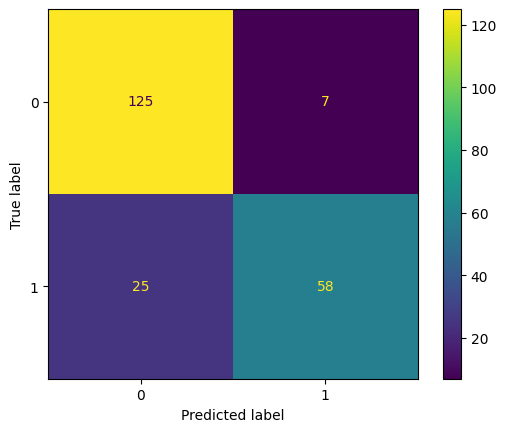

In [174]:
cm_rfCl = confusion_matrix(y_test, y_rfCl)
print('RANDOM FOREST CLASSIFIER:')
ConfusionMatrixDisplay(confusion_matrix=cm_rfCl).plot();

KNN:


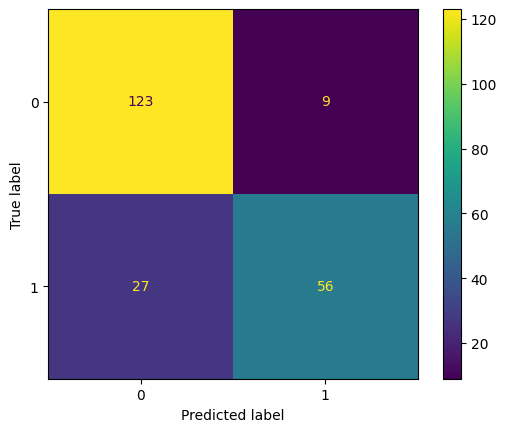

In [175]:
cm_knnCl = confusion_matrix(y_test, y_knnCl)
print('KNN:')
ConfusionMatrixDisplay(confusion_matrix=cm_knnCl).plot();

SVM:


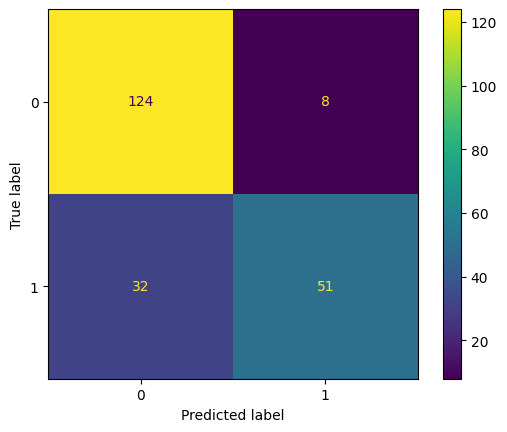

In [176]:
cm_svc = confusion_matrix(y_test, y_svc)
print('SVM:')
ConfusionMatrixDisplay(confusion_matrix=cm_svc).plot();

GRADIENT BOOSTING:


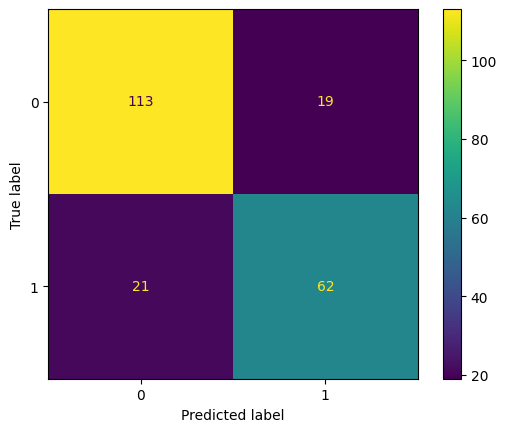

In [177]:
cm_gbCl = confusion_matrix(y_test, y_gbCl)
print('GRADIENT BOOSTING:')
ConfusionMatrixDisplay(confusion_matrix=cm_gbCl).plot();

GRADIENT BOOSTING:


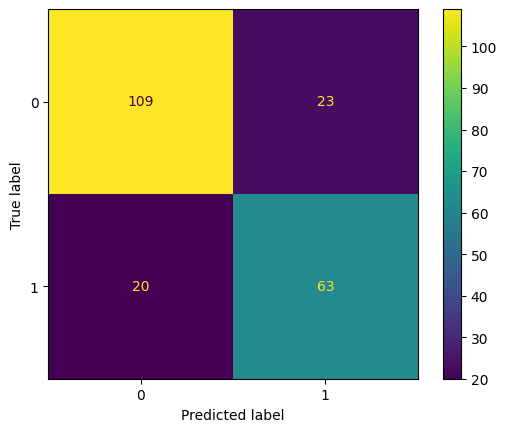

In [178]:
cm_xgbCl = confusion_matrix(y_test, y_xgbCl)
print('GRADIENT BOOSTING:')
ConfusionMatrixDisplay(confusion_matrix=cm_xgbCl).plot();

### 5.3 Curva ROC

In [179]:
# Random Forest
rfCl_pred_prob = rfCl.predict_proba(X_test)[:, 1]
# KNN
knnCl_pred_prob = knnCl.predict_proba(X_test)[:, 1]
# SVM
svc_pred_prob = svc.predict_proba(X_test)[:, 1]
# Gradient Boosting
gbCl_pred_prob = gbCl.predict_proba(X_test)[:, 1]
# XGBoost
xgbCl_pred_prob = xgbCl.predict_proba(X_test)[:, 1]

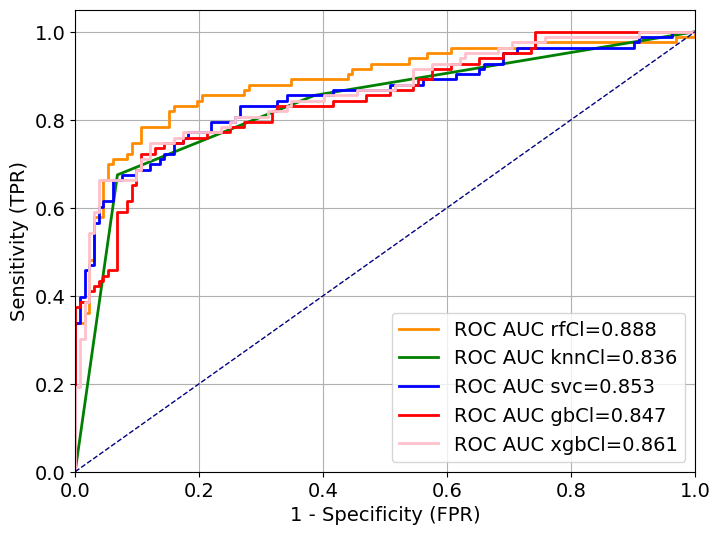

In [180]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.grid()

# rfCl
fpr, tpr, roc_auc = roc_curve_and_score(y_test, rfCl_pred_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC rfCl={0:.3f}'.format(roc_auc))
# knnCl
fpr, tpr, roc_auc = roc_curve_and_score(y_test, knnCl_pred_prob)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC knnCl={0:.3f}'.format(roc_auc))
# svc
fpr, tpr, roc_auc = roc_curve_and_score(y_test, svc_pred_prob)
plt.plot(fpr, tpr, color='blue', lw=2,
         label='ROC AUC svc={0:.3f}'.format(roc_auc))
# gbCl
fpr, tpr, roc_auc = roc_curve_and_score(y_test, gbCl_pred_prob)
plt.plot(fpr, tpr, color='red', lw=2,
         label='ROC AUC gbCl={0:.3f}'.format(roc_auc))
# xgbCl
fpr, tpr, roc_auc = roc_curve_and_score(y_test, xgbCl_pred_prob)
plt.plot(fpr, tpr, color='pink', lw=2,
         label='ROC AUC xgbCl={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.show()

## 6. Conclusiones

Random Forest sería el mejor modelo de todos para este problema de clasificación:
- Mayor área bajo la curva, predice mejor 1 (TPR alto), asi como también menor rango de falsos positivos o FP.
- Según reporte de clasificación, presenta mayor accuracy, además de mejor recall y precision al predecir 1.